# Part 15: Neural Networks

Author: Kerry Back, Rice University

## Overview

Neural networks are powerful machine learning models inspired by how neurons work in the brain. They learn to recognize patterns by adjusting internal parameters (weights and biases).

**Key Concepts:**

- Neurons: mathematical functions that transform inputs
- Layers: groups of neurons (input, hidden, output)
- Activation functions: non-linear transformations (sigmoid, ReLU)
- Training: optimizing weights/biases to minimize prediction error

## Multi-layer Perceptrons

* A multi-layer perceptron (MLP) consists of "neurons" arranged in layers.
* A neuron is a mathematical function. It takes inputs $x_1, \ldots, x_n$, calculates a function $y=f(x_1, \ldots, x_n)$ and passes $y$ to the neurons in the next level.
  * The inputs in the first layer are the features.
  * The inputs in successive layers are the calculations from the prior level. 
* The last layer is a single neuron (or multiple neurons for multi-class classification) that produces the output.
* "Input layer" doesn't do anything. "Output layer" is last layer. Others are called "hidden layers."

## Rectified Linear Units

- The usual function for the neurons (except in the last layer) is 

$$ y = \max(0,b+w_1x_1 + \cdots + w_nx_n)$$

- Parameters $b$ (called bias) and $w_1, \ldots w_n$ (called weights) are different for different neurons. 
- This function is called a rectified linear unit (ReLU).  
- Analogous to neurons firing in brain:
  - $y>0$ only when $\sum w_ix_i$ is large enough. 
  - A neuron fires when it is sufficiently stimulated by signals from other neurons.

## Output Neuron

- The output doesn't have a truncation.
- For regression problems, it is linear:

$$z = b+w_1y_1 + \cdots + w_ny_n$$ 

- For classification, there is a linear function for each class and predicted probabilities are (called softmax):
$$ \frac{e^{z_i}}{\sum_{j=1}^n e^{z_j}}$$

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
import warnings
warnings.filterwarnings('ignore')

np.random.seed(42)

## Example Task: Digit Classification

Classify hand-written numbers (digits 0 through 9).

The original handwritten digits were pixelated into 64 pixels (8 x 8). Each observation consists of 65 numbers: the true digit and the darkness values of each of the 64 pixels. Darkness values range from 0 (white) to 16 (black).

## Load and Explore the Digits Dataset

In [2]:
# Load the digits dataset
digits = load_digits()
X = digits.data  # 8x8 images flattened to 64 features
y = digits.target  # Digit labels 0-9

print(f"Digits Dataset:")
print(f"  Total samples: {X.shape[0]:,}")
print(f"  Features per sample: {X.shape[1]} (8×8 pixels)")
print(f"  Classes: {len(np.unique(y))} (digits 0-9)")
print(f"  Feature range: [{X.min():.1f}, {X.max():.1f}]")

Digits Dataset:
  Total samples: 1,797
  Features per sample: 64 (8×8 pixels)
  Classes: 10 (digits 0-9)
  Feature range: [0.0, 16.0]


## Visualize Sample Digits

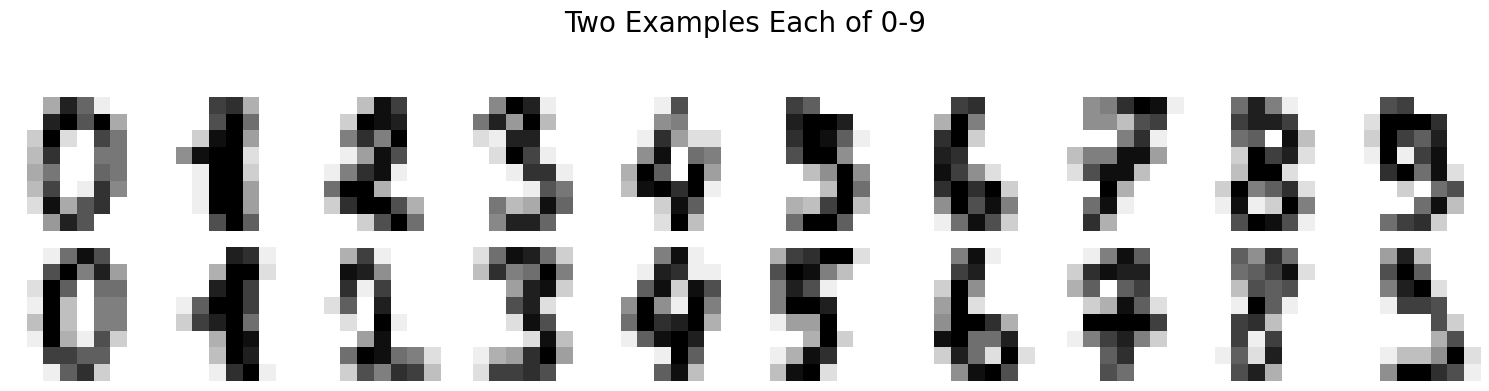

In [3]:
fig, axes = plt.subplots(2, 10, figsize=(15, 4))

for digit in range(10):
    idx = np.where(y == digit)[0][0]
    axes[0, digit].imshow(X[idx].reshape(8, 8), cmap='gray_r')
    axes[0, digit].axis('off')

    idx2 = np.where(y == digit)[0][1]
    axes[1, digit].imshow(X[idx2].reshape(8, 8), cmap='gray_r')
    axes[1, digit].axis('off')

plt.suptitle('Two Examples Each of 0-9', fontsize=20, y=1.02)
plt.tight_layout()
plt.show()

## Understanding Neural Networks with Digits

We'll explore how neural networks learn to classify handwritten digits. 

Each digit image has:
- 64 inputs (pixel values from 0-16)
- 10 possible outputs (digits 0-9)

A simple neural network with one hidden layer can learn the complex patterns that distinguish different digits.

## Prepare Data for Neural Network

In [ ]:
# Normalize the pixel values to [0, 1] range
X_normalized = X / 16.0

# Split into training and test sets (80/20 split)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_normalized, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set: {X_train.shape[0]:,} samples")
print(f"Test set: {X_test.shape[0]:,} samples")
print(f"Features: {X_train.shape[1]} (normalized pixel values)")
print(f"Classes: {len(np.unique(y))} digits (0-9)")

## Train a Simple Neural Network

In [ ]:
## Confusion Matrices

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get predictions for both train and test sets
y_train_pred = nn_model.predict(X_train)
y_test_pred = nn_model.predict(X_test)

# Create confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Training set confusion matrix
cm_train = confusion_matrix(y_train, y_train_pred)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=range(10))
disp_train.plot(ax=axes[0], cmap='Blues', colorbar=False)
axes[0].set_title(f'Training Set Confusion Matrix\nAccuracy: {train_accuracy:.2%}', fontsize=12)

# Test set confusion matrix
cm_test = confusion_matrix(y_test, y_test_pred)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=range(10))
disp_test.plot(ax=axes[1], cmap='Blues', colorbar=False)
axes[1].set_title(f'Test Set Confusion Matrix\nAccuracy: {test_accuracy:.2%}', fontsize=12)

plt.tight_layout()
plt.show()

# Show some statistics
print("Classification errors by digit (Test Set):")
for digit in range(10):
    mask = y_test == digit
    digit_accuracy = (y_test_pred[mask] == digit).mean()
    print(f"  Digit {digit}: {digit_accuracy:.1%} accuracy")

In [ ]:
from sklearn.neural_network import MLPClassifier

# Create a neural network with one hidden layer of 50 neurons
nn_model = MLPClassifier(
    hidden_layer_sizes=(50,),
    activation='relu',
    max_iter=500,
    random_state=42,
    verbose=False
)

# Train the model
nn_model.fit(X_train, y_train)

# Evaluate on both sets
train_accuracy = nn_model.score(X_train, y_train)
test_accuracy = nn_model.score(X_test, y_test)

print(f"Neural Network Performance:")
print(f"  Training accuracy: {train_accuracy:.2%}")
print(f"  Test accuracy: {test_accuracy:.2%}")
print(f"  Number of iterations: {nn_model.n_iter_}")
print(f"\nNetwork Architecture:")
print(f"  Input layer: 64 neurons (one per pixel)")
print(f"  Hidden layer: 50 neurons with ReLU activation")
print(f"  Output layer: 10 neurons (one per digit)")

In [ ]:
## Visualize Predictions

In [ ]:
# Show some test examples with predictions
y_pred = nn_model.predict(X_test)

fig, axes = plt.subplots(2, 10, figsize=(15, 4))
for i in range(20):
    row = i // 10
    col = i % 10
    axes[row, col].imshow(X_test[i].reshape(8, 8), cmap='gray_r')
    axes[row, col].axis('off')
    
    # Color code: green for correct, red for incorrect
    color = 'green' if y_pred[i] == y_test.iloc[i] else 'red'
    axes[row, col].set_title(f'Pred: {y_pred[i]}', color=color, fontsize=10)

plt.suptitle('Sample Predictions (Green=Correct, Red=Incorrect)', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

## How Neurons Work

A neuron calculates a linear function then applies activation:

**Linear Calculation:** z = b + w1×x1 + w2×x2 + ... + w64×x64

- b = bias (intercept)
- w1, w2, ..., w64 = weights (one per pixel)

**Activation Functions:**

- ReLU: h = max(0, z) outputs values >= 0 (used in hidden layer)
- Softmax: converts outputs to probabilities for 10 classes

The parameters (biases and weights) are learned from data during training.

In [ ]:
## Network Complexity Analysis

We'll train multiple neural networks with increasing complexity and compare their performance on training and test data. This helps us understand:
- How model capacity affects performance
- Whether more complex models lead to overfitting
- The trade-off between training and test accuracy

In [ ]:
## Train Networks of Varying Complexity

In [ ]:
# Define different network architectures (increasing complexity)
network_configs = [
    (10,),           # Small: 10 neurons
    (25,),           # Medium-small: 25 neurons
    (50,),           # Medium: 50 neurons
    (100,),          # Large: 100 neurons
    (25, 10),        # Two layers: 25 -> 10
    (50, 25),        # Two layers: 50 -> 25
    (100, 50),       # Two layers: 100 -> 50
    (50, 25, 10),    # Three layers: 50 -> 25 -> 10
    (100, 50, 25),   # Three layers: 100 -> 50 -> 25
]

# Store results
results = []
trained_models = {}

print("Training networks of increasing complexity...\n")

for i, config in enumerate(network_configs):
    # Create and train model
    model = MLPClassifier(
        hidden_layer_sizes=config,
        activation='relu',
        max_iter=500,
        random_state=42,
        verbose=False
    )
    
    model.fit(X_train, y_train)
    
    # Calculate accuracies
    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)
    
    # Calculate number of parameters
    n_params = sum(w.size for w in model.coefs_) + sum(b.size for b in model.intercepts_)
    
    # Store results
    results.append({
        'config': config,
        'config_str': str(config),
        'train_accuracy': train_acc,
        'test_accuracy': test_acc,
        'n_params': n_params,
        'n_layers': len(config),
        'model_idx': i
    })
    
    trained_models[i] = model
    
    print(f"{i+1}. Architecture {config}:")
    print(f"   Parameters: {n_params:,}")
    print(f"   Train accuracy: {train_acc:.2%}")
    print(f"   Test accuracy: {test_acc:.2%}")
    print()

results_df = pd.DataFrame(results)
print("\nSummary:")
print(results_df[['config_str', 'n_params', 'train_accuracy', 'test_accuracy']].to_string(index=False))

In [ ]:
## Plot Accuracy vs. Model Complexity

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Accuracy vs. Number of Parameters
axes[0].plot(results_df['n_params'], results_df['train_accuracy'], 
             'o-', label='Training', linewidth=2, markersize=8)
axes[0].plot(results_df['n_params'], results_df['test_accuracy'], 
             's-', label='Test', linewidth=2, markersize=8)
axes[0].set_xlabel('Number of Parameters', fontsize=12)
axes[0].set_ylabel('Accuracy', fontsize=12)
axes[0].set_title('Accuracy vs. Model Size', fontsize=14)
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

# Plot 2: Accuracy by Model Index
x_pos = range(len(results_df))
width = 0.35
axes[1].bar([x - width/2 for x in x_pos], results_df['train_accuracy'], 
            width, label='Training', alpha=0.8)
axes[1].bar([x + width/2 for x in x_pos], results_df['test_accuracy'], 
            width, label='Test', alpha=0.8)
axes[1].set_xlabel('Model Configuration', fontsize=12)
axes[1].set_ylabel('Accuracy', fontsize=12)
axes[1].set_title('Accuracy by Network Architecture', fontsize=14)
axes[1].set_xticks(x_pos)
axes[1].set_xticklabels([f'M{i+1}' for i in x_pos], rotation=0)
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Print best models
print("\nBest Models:")
best_test_idx = results_df['test_accuracy'].idxmax()
best_train_idx = results_df['train_accuracy'].idxmax()

print(f"\nBest Test Accuracy:")
print(f"  Architecture: {results_df.loc[best_test_idx, 'config']}")
print(f"  Test accuracy: {results_df.loc[best_test_idx, 'test_accuracy']:.2%}")
print(f"  Train accuracy: {results_df.loc[best_test_idx, 'train_accuracy']:.2%}")
print(f"  Parameters: {results_df.loc[best_test_idx, 'n_params']:,}")

print(f"\nBest Train Accuracy:")
print(f"  Architecture: {results_df.loc[best_train_idx, 'config']}")
print(f"  Train accuracy: {results_df.loc[best_train_idx, 'train_accuracy']:.2%}")
print(f"  Test accuracy: {results_df.loc[best_train_idx, 'test_accuracy']:.2%}")
print(f"  Parameters: {results_df.loc[best_train_idx, 'n_params']:,}")

In [ ]:
## Confusion Matrices for Selected Models

In [ ]:
# Select three models to compare: small, medium, large
selected_models = [0, 2, 6]  # (10,), (50,), (100, 50)
model_names = ['Small (10)', 'Medium (50)', 'Large (100, 50)']

fig, axes = plt.subplots(3, 2, figsize=(12, 16))

for idx, (model_idx, name) in enumerate(zip(selected_models, model_names)):
    model = trained_models[model_idx]
    config = results_df.loc[model_idx, 'config']
    
    # Get predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Training confusion matrix
    cm_train = confusion_matrix(y_train, y_train_pred)
    disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=range(10))
    disp_train.plot(ax=axes[idx, 0], cmap='Blues', colorbar=False)
    train_acc = results_df.loc[model_idx, 'train_accuracy']
    axes[idx, 0].set_title(f'{name}: Training\n{config} - Accuracy: {train_acc:.2%}', fontsize=11)
    
    # Test confusion matrix
    cm_test = confusion_matrix(y_test, y_test_pred)
    disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=range(10))
    disp_test.plot(ax=axes[idx, 1], cmap='Blues', colorbar=False)
    test_acc = results_df.loc[model_idx, 'test_accuracy']
    axes[idx, 1].set_title(f'{name}: Test\n{config} - Accuracy: {test_acc:.2%}', fontsize=11)

plt.suptitle('Confusion Matrices: Small vs. Medium vs. Large Networks', 
             fontsize=14, y=0.995)
plt.tight_layout()
plt.show()

## Network Structure for Digits

Our neural network:

- Input layer: 64 inputs (one per pixel)
- Hidden layer: 50 neurons with ReLU activation
- Output layer: 10 neurons with softmax (one per digit)

**Parameters:**

- Hidden layer: 50 biases + 50×64 weights = 3,250 parameters
- Output layer: 10 biases + 10×50 weights = 510 parameters
- Total: 3,760 parameters to optimize

## Define ReLU Function

In [ ]:
def relu(z):
    """ReLU activation function: max(0, z)"""
    return np.maximum(0, z)

def softmax(z):
    """Softmax activation: converts to probabilities"""
    exp_z = np.exp(z - np.max(z))  # Subtract max for numerical stability
    return exp_z / exp_z.sum()

## Example: Forward Propagation with a Test Digit

In [ ]:
# Take the first test example
x_input = X_test[0]
true_digit = y_test.iloc[0]

# Get the trained weights and biases from our model
W1 = nn_model.coefs_[0]  # Shape: (64, 50)
b1 = nn_model.intercepts_[0]  # Shape: (50,)
W2 = nn_model.coefs_[1]  # Shape: (50, 10)
b2 = nn_model.intercepts_[1]  # Shape: (10,)

# Hidden layer calculation
z1 = x_input @ W1 + b1
h = relu(z1)

# Output layer calculation
z2 = h @ W2 + b2
probs = softmax(z2)

predicted_digit = np.argmax(probs)

# Visualize the digit and predictions
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Show the digit
ax1.imshow(x_input.reshape(8, 8), cmap='gray_r')
ax1.axis('off')
ax1.set_title(f'True Digit: {true_digit}', fontsize=14)

# Show the probabilities
ax2.bar(range(10), probs, color=['green' if i == predicted_digit else 'blue' for i in range(10)])
ax2.set_xlabel('Digit')
ax2.set_ylabel('Probability')
ax2.set_title(f'Predicted: {predicted_digit} (confidence: {probs[predicted_digit]:.1%})', fontsize=14)
ax2.set_xticks(range(10))

plt.tight_layout()
plt.show()

print(f"\nForward Propagation Details:")
print(f"  Input: 64 pixel values")
print(f"  Hidden layer: 50 neurons, max activation = {h.max():.3f}")
print(f"  Output layer: 10 probabilities")
print(f"  Prediction: {predicted_digit} (True: {true_digit})")
print(f"  Top 3 predictions:")
for i in np.argsort(probs)[::-1][:3]:
    print(f"    Digit {i}: {probs[i]:.1%}")

## Summary

**Neural Networks for Digit Classification:**

- Multi-layer perceptrons (MLPs) consist of neurons arranged in layers
- Each neuron applies weights, bias, and activation function (ReLU for hidden, softmax for output)
- Transform pixel inputs through layers to learn complex patterns
- Parameters (weights and biases) are optimized during training via backpropagation

**Key Findings from Complexity Analysis:**

- Model complexity (number of parameters) affects both training and test accuracy
- Larger networks can achieve higher training accuracy but may not always generalize better
- The optimal architecture balances model capacity with generalization
- Confusion matrices reveal which digits are most easily confused (e.g., 8 vs 3, 9 vs 4)

**Best Practices:**

- Normalize input features (pixel values) for better convergence
- Use train/test split to evaluate generalization
- Compare multiple architectures to find the best model
- Monitor both training and test accuracy to detect overfitting
- Use confusion matrices to identify specific classification challenges

**Key Takeaways:**

- Neural networks excel at image classification tasks
- ReLU activation allows learning non-linear patterns
- Softmax output gives interpretable probabilities
- More neurons/layers increase capacity but also computational cost
- Model selection requires balancing complexity with performance